# Neuroscience 301
# Python Crash Course
## Part 2 - Intro to NumPy
### Content
[Section 1 - Import Statements](#Section1)<br/>
[Section 2 - What is an array?](#Section2)<br/>
[Section 3 - Generating Arrays](#Section3)<br/>
[Section 4 - Common Array Functions](#Section4)<br/>
[Section 5 - Math with Arrays](#Section5)<br/>
[Section 6 - Illustrative Example](#Section6)<br/><br/><br/>
Welcome back! This notebook picks up where we last left off and will assume that you have a good grasp on everything from the last notebook. If you get confused about something, feel free to go back and look at the first notebook or reach out if you still can't figure it out.<br/><br/>
This tutorial covers the basics of using the NumPy python module, short for Numerical Python. <code>numpy</code> provides us with a bunch of new functions and data types that we can use to extend pythons functionality. In particular, <code>numpy</code> gives us the ability to work with numerical data in the form of large multi-dimensional arrays and matrices, as well as mathematical functions to operate on these arrays. These arrays are very useful for representing certain types of data. An array could contain voltage measurements in time from a lab experiment, they could be xyz coordinates of a neurons in the brain, or even images. Really they are just an easy way to manipulate numerical data quickly and at scale in python.

<a id='Section1'></a>
### Section 1 - Import Statments and Using Modules
Before we can start learning how to use <code>numpy</code>, we must first import it

In [ ]:
import numpy as np

What I have written above is called an **import statement**. Running it means we now have access to all of the functions and data types that come with <code>numpy</code> and we can access them by using the <code>np.</code> prefix.</br></br>
Whenever we want to import a module we must write an import statement like this. For common modules which we will use a lot, it is common to provide an "alias" for the module. In this case we gave numpy the alias <code>np</code> and this is the canonical alias it is given. Aliases allow us to more easily refer to modules later.<br/></br>
For today, we are also going to want some plotting/visualization capabilities and so I am going to import a visualization module called <code>matplotlib</code>. We won't go over how to use matplotlib in this notebook, but we will learn about how to use numpy in tandem with other modules to make visualizations in future sessions.

In [ ]:
import matplotlib.pyplot as plt

<a id='Section2'></a>
### Section 2 - What is an array?

Arrays are ***the*** central data structure of numpy. They are similar to a python list but are capable of much much more. There is A LOT of functionality that arrays have access to that don't exist for the generic python list.<br/><br/>

At their core, arrays are just lists of numbers. But perhaps most importantly is that numpy arrays are built to be multidimensional. We can have one-dimensional arrays, also known as vectors:

$$\begin{bmatrix} 1 & 2 & 3 & 4 & 5 \end{bmatrix}$$

Or we can have two-dimensional arrays, also known as matrices:

$$\begin{bmatrix}0 & 1 & 2 & 3 \\ 4 & 5 & 6 & 7 \\ 8 & 9 & 10 & 11 \end{bmatrix}$$

However, we aren't limited to just 2-dimensions and for particular tasks or projects we might *need* more than 2. Take an RGB image for example. We can represent an RGB image as a 3-dimensional array of size <code>(H, W, 3)</code> where <code>H</code> is the height of the image <code>W</code> is its width, and the 3 is for the 3 color channels, red, green, and blue.<br/><br/> For now lets just stick to the basics.<br/><br/>
We can define an array just like any other variable.

In [ ]:
arr = np.array([0, 1, 2, 3])
print(arr)

As was said before, arrays are similar to the built-in python list, but they have much more functionality and are also much more efficient for processing numerical data, so your code will be much faster if you do math with numpy arrays rather than Python lists. To see some of this functionality, lets see what happens if we make an equivalent array using the built-in list and we try to square the list.

In [ ]:
python_arr = [0, 1, 2, 3]
print(python_arr)
print(python_arr ** 2)

Okay, so we got an error. Python won't let us do this. What happens if we try the same thing with our numpy array?

In [ ]:
print(arr ** 2)

So as you can see when we squared our numpy array, we got back a new array where every element of the array got squared, but when we tried it with a python list of lists, we got back an error. This highlights why we like numpy arrays so much, they make doing otherwise difficult manipulations of numerical data a breeze compared to using native python. If we wanted to do this with a list we'd have to use a for loop or write some slow and error prone code.</br></br>
There are many more things we can do than just square arrays.

In [ ]:
print(arr)
print(arr + 1)
print(arr / 2)
print(arr % 2)

We can also query arrays to retrieve the values they contain at certain indices

In [ ]:
print(arr[0])   # Remember, python uses zero-indexing! The first entry is the zeroth entry
print(arr[1])

All of this generalizes to numpy arrays that are higher dimensional. Lets construct a 2d array and get a feel for working with them.

In [ ]:
arr = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])
print(arr)
print(arr + 1)
print(arr / 2)
print(arr % 2)

How can we index this array to query certain values? We can do this very similarly to how we indexed lists.

In [ ]:
print(arr[0])
print(arr[1])
print(arr[2])



As you see, when we just use one number to query a 2-dimensional array, we get back the corresponding row. In order to get a specific element we need to use two indices.

In [ ]:
print(arr)
print(arr[0, 0])
print(arr[1, 2])

We can also get specific columns of a 2d array by using slices like we did with lists.</br></br>
Let's say for example, that we wanted to get the third column of our array, the one that contains <code>[2, 6, 10]</code> as its entries (I refer to it as the third column, but remember that we start from zero in python).</br></br> We can do that by saying we want the entry in the third position in every row. To indicate that we want **every** row, we replace the row index with <code>:</code>.

In [ ]:
print(arr)
print(arr[:, 2])

The same syntax works for grabbing an individual column, if you prefer it over using a single index. Now we specify that we want the elements in a specific row (the first one here), across all columns:

In [ ]:
print(arr[0])
print(arr[0,:])

You can read syntax like <code>[:, 2]</code> as "Every row, column index two" or "All of the elements in column 2" (with the understanding that we start at column 0).

In numpy when working with 2d arrays, our first index will always refer to the *rows* of our array. If you ever aren't sure which index position refers to which dimension, you can use the <code>shape</code> parameter to see the size of each dimension.

In [ ]:
print(arr.shape)

Here we got back <code>(3,4)</code> because we have 3 rows and 4 columns. It's important to always keep in mind the shape of your arrays so you don't get confused or introduce bugs. Always check .shape before doing anything else if you aren't 100% sure about the size of your array!

We can also do all the same kinds of slicing we did with lists with numpy arrays, and they will behave as you expect. For example, if we want to retrieve all but the first row of our array we can do that like so.

In [ ]:
print(arr[1:])

When you are working with data, you will frequently have to slice across different axes. This is tricky at first to wrap your head around! The syntax is the same as before. For example, let's say we want the first two rows and first columns of our array. We would do it as follows:

In [ ]:
print(arr[:2,:2])

### Exercise 2.1
Print out the contents of the last column of <code>arr</code> excluding the first row. Hint: Recall that indexing with -1 will give the last element.

### **Now is a good time to pause and make sure you understand how querying and indexing of arrays works. This is really important and its worth slowing down to make sure you fully get it. Understanding indexing is probably the most important skill when it comes to using numpy.**

Next we'll introduce one of the most important and commonly used numpy functions: reshape. We can use it to change the ordering of our elements and the shape of our array, so long as the numbers add up. For example

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
print(arr)
print('New shape: (3, 4)')
arr = arr.reshape(3, 4)
print(arr)
print('New shape: (4, 3)')
arr = arr.reshape(4, 3)
print(arr)
print('New shape: (6, 2)')
arr = arr.reshape(6, 2)
print(arr)
print('New shape: (2, 6)')
arr = arr.reshape(2, 6)
print(arr)

Keep in mind that, as you can see above, when reshaping a 1D array into a 2D array, we fill up the first row with entries from the array, then the second row, and so on. This is just the default; if you would like to instead fill up each column sequentially, specify <code>order='F'</code> in the reshape function.

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
print(f'Array: {arr}')
print("Reshaping to shape (3,4) with default order")
arr = arr.reshape(3, 4)
print(f'{arr}\n')

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
print(f'Array: {arr}')
print("Reshaping to shape (3,4) with alternative order")
arr = arr.reshape(3, 4,order='F')
print(arr)

### Exercise 2.2
Reshape the first row of the following matrix to a 2x2 matrix, and save it to a variable named 'my_matrix.' Your matrix should have entries in this order:
$$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}.$$

<a id='Section3'></a>
### Section 3 - Generating Arrays

We typically don't create numpy arrays by putting in all the values ourselves. Numpy comes with many ways to generate arrays with specific elements so long as we give it arguments. The most common ones are np.zeros, np.ones, np.arange, np.linspace, and np.random.rand.

In [ ]:
zero_arr = np.zeros(shape=7)     # Creates an array with seven zeros
one_arr = np.ones(shape=10)      # Creates an array with ten ones
rang_arr = np.arange(stop=5)     # Creates a numpy array with each integer from 0 to 4
lin_arr = np.linspace(start=0, stop=1, num=11)      # Fills up an array with 11 floats evenly spaced between 0 and 1
random_arr = np.random.rand(3,3) # Create a 3x3 array with random entries between 0 and 1
print(zero_arr)
print(one_arr)
print(rang_arr)
print(lin_arr)
print(random_arr)

We aren't limited to one-dimensional arrays when using these functions either.

In [ ]:
zero_arr = np.zeros(shape=(7, 7))
print(zero_arr)

We can also use the <code>np.zeros_like()</code> and <code>np.ones_like()</code> functions to generate arrays that have the same shape as a different one, but are filled with zeros or ones respectively

In [ ]:
print(arr.shape)
print(np.zeros_like(arr))
print(np.ones_like(arr))

Of course, we can change the values of arrays just like we could change the values of lists.

In [ ]:
print(zero_arr)
zero_arr[3] = np.ones(7)
zero_arr[:, 3] = np.ones(7)
print(zero_arr)

And of course, we can use all the stuff we learned in the other notebook (for loops, if statements, functions) to help make this easier.

### Exercise 3.1
Try and guess what the entries of the above array will be when we are done running through the following for loop. Seriously go through it and write out on paper which entries will be one and which will be zero. Remember we are starting from the matrix above. 

In [ ]:
for i in range(7):
    zero_arr[i, i] = 1
    zero_arr[i, -i - 1] = 1

Then, uncomment the 3 lines below and run the cell to see what the array looks like. 

In [ ]:
#print(zero_arr)
#plt.imshow(zero_arr, cmap='binary') 
#plt.show()

Numpy allows us to use boolean indexing which is super nice! You can do that like this

In [ ]:
arr = np.arange(11)
print(arr)
print(arr[arr % 2 == 0])                     # Get all elements that are divisible by 2
print(arr[arr >= 5])                         # Get all elements that are greater than or equal to 5
print(arr[(arr % 2 == 0) & (arr >= 5)])      # Get all elements that are divisible by 2, and, are greater than or equal to 5    

Make sure you understand this, because this is a really powerful and common operation. Maybe you want to grab only the entries of an array above some threshold, like if you were writing some script to detect neuron spikes.

<a id='Section4'></a>
### Section 4 - Common array functions

Here we'll go through some of the most common functions you'll use when working with numpy arrays.

Numpy allows us to extract numerical information about our arrays like the max, mean, etc.

In [ ]:
arr = np.arange(101)
print(arr.max())    # Note that we need to use the parentheses after these but didn't when we called arr.shape earlier
print(arr.min())    # this is because these are functions, whereas the shape is considered an attribute. Something to keep in mind!
print(arr.mean())
print(arr.std())

Maybe you want to know when the min or max occur rather than what the actual minimum and maximum are. For that you'll use <code>argmin</code> or <code>argmax</code>. These give you the index corresponding to the maximum.

In [ ]:
arr = np.array([-5,5,8,9,2])
print(f'Array: {arr}')
print(f'Index of maximum: {np.argmax(arr)}')
print(f'Maximum: {arr[np.argmax(arr)]}')
print(f'Index of minimum: {np.argmin(arr)}')
print(f'Minimum: {arr[np.argmin(arr)]}')

If you call <code>argmin</code> or <code>argmax</code> on a higher dimensional array, it will flatten the array first into a 1D array and then give you the maximum index. Oftentimes this isn't what you want, so you can use <code>np.unravel_index</code> to convert the unraveled index into something you can actually use to index your array. You must tell <code>np.unravel_index</code> what the shape of the original array is.

In [ ]:
arr = np.arange(16).reshape(4,4,order='F')
print(f'Array: \n {arr}')
print(f'Index of maximum (Flattened): {np.argmax(arr)}')
print(f'Index of maximum (Unraveled): {np.unravel_index(np.argmax(arr),(4,4))}')

Sometimes you want the indices satisfying a more complicated condition. For that we use <code>np.argwhere</code>. For example, let's say I want the indices of the elements from the previous array that are perfect squares. I'll check if each element's square root does not change in value if I cast it to an integer, which tells me that the square root was an integer. To cast the array to an array of integers, I'll use the <code>astype</code> method.

In [ ]:
print(f'Array: \n {arr}')
perfect_square_indices = np.argwhere(np.sqrt(arr)==np.sqrt(arr).astype(int))
print(f'Indices of perfect squares: \n {perfect_square_indices}')

Note that if I just wanted to grab the perfect squares, I could just use boolean indexing.

In [ ]:
print(f'Perfect squares: {arr[np.sqrt(arr)==np.sqrt(arr).astype(int)]}')

Let's say I want to set all the values of an array that don't satisfy a certain condition to  See the documentation: https://numpy.org/doc/stable/reference/generated/numpy.where.html if you're interested.

In [ ]:
print(f'Perfect squares: {arr[np.where(np.sqrt(arr)==np.sqrt(arr).astype(int))]}')

In [ ]:
n

### Exercise 4.1

Use <code>np.argwhere</code> to find the indices of the elements of <code>arr</code> that are greater than or equal to 5.

The most common mathematical functions are all represented in numpy:

$e^x: $ <code>np.exp(x)</code>

$\sin(x): $ <code>np.sin(x)</code>

$\ln(x): $ <code>np.log(x)</code>

$\log_{10}(x): $ <code>np.log10(x)</code>

$\sqrt{x}: $ <code>np.sqrt(x)</code>

In [ ]:
print(np.sin(np.pi / 2))
print(np.log(np.e))         # np.log is assumed to be the natural logarithm
print(np.exp(4))
print(np.sqrt(9))

# We can give arrays instead of numbers as well and numpy will compute it for each element in the array!
period = np.linspace(0, 2 * np.pi, 9)
print(np.cos(period))
plt.plot(period, np.cos(period))     # Again, just showing that it is actually computing cos(period), we are just taking very few samples from the cosine function
plt.show()                           # If we were to take more


**"Hey, I thought cos(pi/2) == 0,  why did we get 6.12323400e-17?"** <br/>
Computers have finite precision. While $\pi$ has an infinite number of decimals in reality, in numpy $\pi=3.141592653589793$. Issues like this often occur when computing really small numbers. As you can tell the number is incredily small and is basically zero. If numpy ever gives you a number around 1e-16 or lower that you expect to be zero, you can consider that to be zero.

Common statistical functions are also in numpy.

mean: <code>np.mean</code>

standard deviation: <code>np.std</code>

median: <code>np.median</code>

Something that's particularly nice (and very important!), is that we can use these numerical functions to get values from an array **along a specific axis/dimension**. In other words, when we use <code>arr.mean()</code> we don't have to take the mean of the entire array, but we can instead ask for the mean of the columns, or the mean of the rows, etc.

In [ ]:
arr = np.arange(1, 49).reshape(2, 24)   # Here we make a list of numbers from 1 to 48 and then use numpys reshape function to turn it into 2 rows with 24 columns each
print(arr.shape)
print(arr)

# Now we can ask for either the average across the columns, or the average across the rows by specifying the axis!
print()    # This just tells python to print a blank line
print('Average column value:', arr.mean(axis=0))
print()
print('Average row value:', arr.mean(axis=1))

This kind of operation is extremely common and you should make sure you feel comfortable with how it works.</br></br>

### Exercise 4.2
Here is something that you will certainly do to analyze your lab data. Imagine you have extracellular recordings from lab. You have 25 recordings that were each 1 second long and recorded at 50Hz, so you have a 25x50 array. Each row corresponds to a recording, and each column corresponds to a time point. You want to know what the average potential was at each point in time across your recordings. Average <code>lab_recordings</code> across trials and save the result in <code>average_recording</code>. Next, compute the standard deviation across trials and save the result in <code>recording_std</code>. When you're done, run the plotting code in the next cell. Hint: Check the shape of <code>average_recording</code> after you're done to make sure you did it right. Don't worry about how <code>lab_recordings</code> is generated if you don't understand it.

This exercise should show you how trial averaging helps us to pick out trends from noisy data.

In [ ]:
np.random.seed(1)
time_points = np.linspace(0,1,50)
lab_recordings = 10*np.array([np.sin(1000*np.pi*time_points) + 5*np.random.rand(50) for _ in range(25)])
print(lab_recordings.shape)
#average_recording = 
#recording_std = 

In [ ]:
recording_sem = recording_std / np.sqrt(25)
fig,ax = plt.subplots(1,2,sharex=True,sharey=True)
ax[0].plot(np.linspace(0,1,50),lab_recordings[0])
ax[0].set_ylabel("Microvolts")
ax[0].set_title("Example Trial Response")
ax[1].plot(np.linspace(0,1,50),average_recording)
ax[1].fill_between(np.linspace(0,1,50),average_recording-recording_sem,average_recording+recording_sem,alpha=0.3)
ax[1].set_ylabel("Microvolts")
ax[1].set_xlabel("Time (seconds)")
ax[1].set_title("Trial Averaged Response")

The light blue around our trial averaged response is the standard error of the mean (SEM), which is the standard deviation divided by the square root of the number of trials. Whenever you report a trial average, you should report this as well to give an indication of how much variability is in your data. In this case, it's clear that the sinusoidal pattern we find in the trial averaged data is something 'real' in our data, not merely noise.

<a id='Section5'></a>
### Section 5 - Math with Arrays

We've already seen that we can do some math with arrays that we weren't able to do with native python lists, but we can still do much more.

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6])
print(arr + 1)
print(arr / 2)
print(arr * 8)

We can also add together two arrays, so long as they have the same shape.

In [ ]:
arr2 = np.array([1, 1, 1, 0, 0, 0])
print(arr + arr2)

Lets see what happens if they don't have the same shape

In [ ]:
arr2 = np.ones(shape=10)
print(arr + arr2)

And if we are dealing with multi-dimensional arrays we can also do matrix multiplication using the @ symbol (this is unique to numpy). If you aren't familiar with matrix multiplication don't worry about this.

In [ ]:
arr1 = np.arange(8).reshape(2, 4)
arr2 = np.arange(8).reshape(4, 2)
print(arr1 @ arr2)

Operations can also be applied to a specific slice of an array. Try to understand the following example.

In [ ]:
arr = np.arange(16).reshape(4,4)
print(arr)
arr[2:,2:] = np.arange(4).reshape(2,2)**2
print(arr)

### Exercise 5.1

Use a for loop to multiply each row of the following array by its row index + 1. So the first row (index 0) should be unchanged, the second row should be doubled, the third row should be tripled, and the fourth row should be quadrupled. Save the resulting array in <code>new_arr</code>.

In [ ]:
arr = np.arange(16).reshape(4,4)
print(arr)
new_arr = np.zeros((4,4))
### your code here



print(new_arr)

<a id='Section6'></a>
### Section 6 - An illustrative Example
Numpy is deep. There is loads more functionality we could *talk* about, but I think for right now it is best to take a slight detour and talk about why we should care about numpy and the tools it gives us as neuroscientists.<br/><br/>
Let's say that you are taking collecting electrophysiological data from a cockroach as you stimulate one of the hairs on its leg. Let's say for some stimulus condition you collect 10 trials. Your data might look something like this

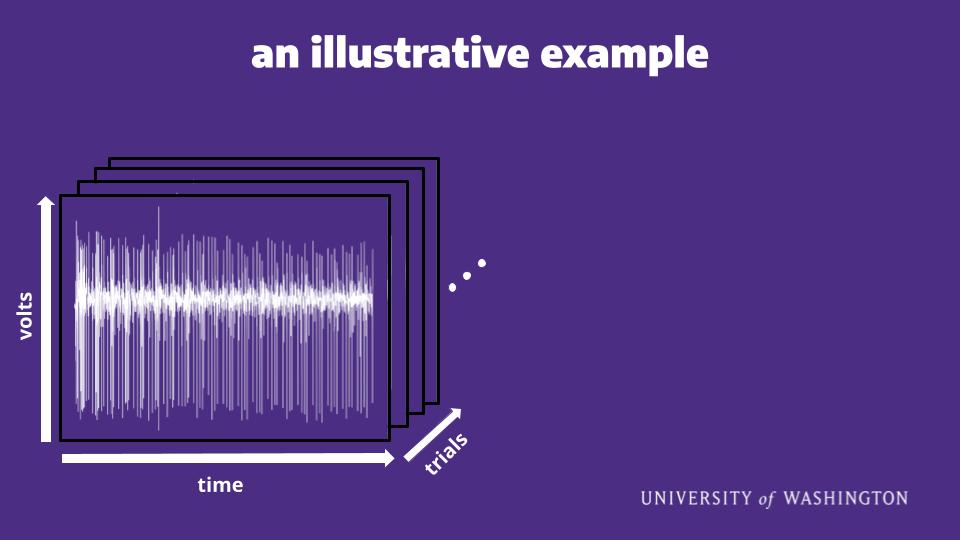

Now what if we want to extract some numerical data from these trials. Maybe something like, "what did the average response to *this* stimulus condition look like, across trials?"<br/>
How could we go about answering a question like that?<br/>
Well the first thing we need to do is just get our data into a form that we can represent numerically, and the best way to do that is with.....an array!

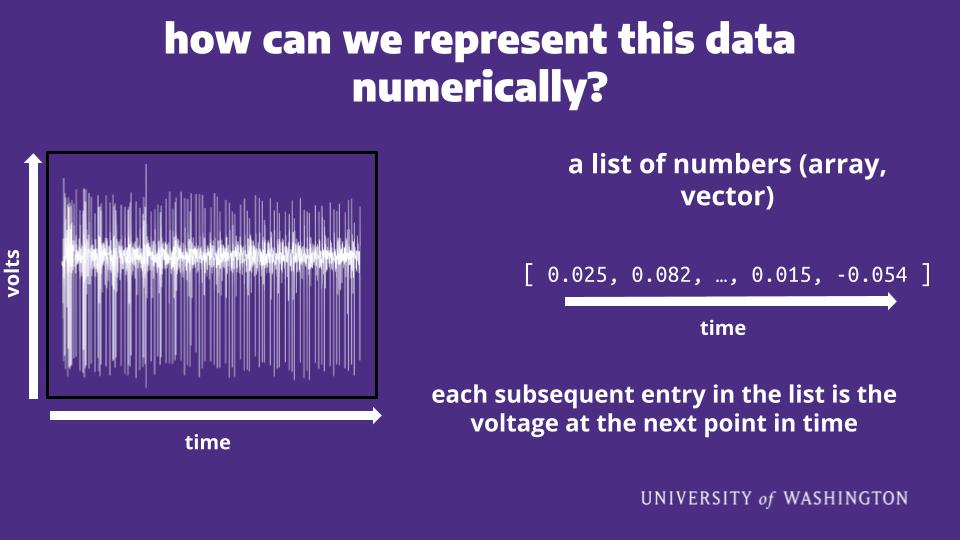

The above example is with only one trial, but what if we have 10 like before?<br/>
In that case, we can still just put all of our data into an array, we'll just need to add another dimension

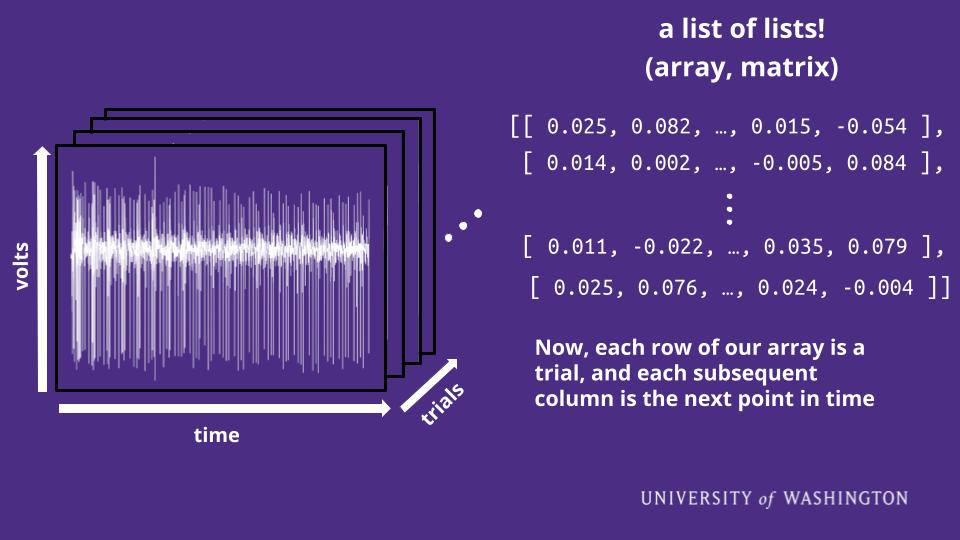

Lets load some data and walk through the process of finding out some information about it.

In [ ]:
# LabChart can export data into a matlab file which we can load with the scipy library
from scipy.io import loadmat
data = loadmat('ExampleData.mat')['data'][0]   # The details of this line are unimportant. For now, we are just trying to look at a typical workflow
print(data.shape)

Okay so LabChart gave us our data in the form of an array with 200k entries. Let's quickly plot it to see what we are looking at.

In [ ]:
plt.plot(data)
plt.show()

Huh, looks weird, let's only plot the first 20000 entries since it looks like that's where these weird cycles are happening.

In [ ]:
plt.plot(data[:20000])
plt.show()

Ahhh okay, so the first 10000 entries is our data. It is one second of recording at 10000 samples/sec. The second half is our stimulation, what was on channel 2 in labchart. I don't really need that right now, so I am going to use numpy to split our data into a new row every 10000 entries.

In [ ]:
data = np.array_split(data, 20)
data = np.array(data)
print(data.shape)

Awesome! Now lets see what each row of our data looks like

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))    # Again, you can ignore the plotting details for now
ax[0].plot(data[0], lw=0.8)              # Plotting the first row of our data
ax[1].plot(data[1], lw=0.8)              # Plotting the second row of our data
fig.tight_layout()
plt.show()

Sweet! For this experiment, our stimulus was a 50Hz sinewave, and we can clearly see that.<br/>
I am now going to further process our data to get our channels separated into their own arrays.

In [ ]:
ch1 = data[::2]          # This syntax tells numpy to retrieve every other row, starting at the 0th row
ch2 = data[1::2]         # This syntax tells numpy to retrieve every other row, starting at the 1st row
print(ch1.shape, ch2.shape)

Fantastic! We now have two different arrays for each channel. I'm going to plot my first channel data to see what it looks like.

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(12, 8), sharey=True)
for i in range(5):
    ax[0, i].plot(ch1[i], lw=0.4)
    ax[0, i].set_title(f'Trial {i + 1}')
    ax[1, i].plot(ch1[i + 5], lw=0.4)
    ax[1, i].set_title(f'Trial{i + 6}')
plt.show()

Okay, so it looks like thereis a pattern, but there still was a lot of variation across trials. What would be nice is if I could average all of my trials together to see what the cells typically did in response to this sine wave.<br/>
Luckily, doing that with numpy is *super* simple, and in fact we already did it earlier in this notebook!

In [ ]:
avg_response = np.mean(ch1, axis=0)
print(avg_response.shape)

In [ ]:
plt.plot(avg_response, lw=0.6)
plt.show()

Okay cool, looks like a pattern is starting to emerge maybe in the spike timing.<br/>
I said before, that our stimulus here was a 50Hz sine wave. That means that 50 periods of stimulation occured in this 1 second recording. Since we sampled at 10000Hz, with some quick algebra you can see that one period is 200 entries in our array.<br/>
Lets split this average into periods and then take their average to see what a typical stimulation cycle looks like.

In [ ]:
stim_periods = avg_response.reshape(50, 200)
print(stim_periods.shape)       # Make sure everything happened correctly
avg_period = np.mean(stim_periods, axis=0)    # Average across every period of stimulation in our 1 second trial
print(avg_period.shape)

In [ ]:
plt.plot(avg_period)
plt.show()

Woah look at that! Looks like our spikes occur just after half of a period (pi radians) in our data! Cool! Now I have something to write about in my lab report! Lets also quickly look at the standard deviation.

In [ ]:
std_period = np.std(stim_periods, axis=0)
plt.plot(-avg_period)
plt.fill_between(np.arange(200), avg_period - std_period, avg_period + std_period, alpha=0.4)
plt.show()

Awesome! With some final tuning this could be a figure in a lab report, the only problem is that we need to change our units to seconds, and put labels, but this is a typical workflow!